<a href="https://colab.research.google.com/github/abishek151/Coding-/blob/main/Water_Quality_Prediction_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


While predecting water quality our target is Potability which in data set indicates if water is safe for consumption by human the water is Potable and represented by 1 whereas water is not potable and its value is 0.

#Importing data 

In [ ]:
import gdown
dataset_url = "https://drive.google.com/uc?export=download&id=1qdTn9fbN_kiydoNjDNMG1fo_iOPgZKOu"
filename = "water_potability"
gdown.download(dataset_url, filename)

Downloading...
From: https://drive.google.com/uc?export=download&id=1qdTn9fbN_kiydoNjDNMG1fo_iOPgZKOu
To: /content/water_potability
100%|██████████| 525k/525k [00:00<00:00, 90.9MB/s]


'water_potability'

#Converting CSV file to data frame using Pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/water_potability')

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

1. pH value: The electrically charged particles in a substance are measured by pH. It describes the substance's acidity or alkalinity (basicity). Most drinking water has a pH between 6.5 and 8.5. The pH of most drinking-water lies within the range 6.5–8.5 according to WHO.

2. Hardness: The ability of water to form soap due to calcium and magnesium precipitation was the original definition of hardness.

3. Solids : Water with a high TDS rating is one that has a high mineral content. The recommended Total dissolved solids (TDS) level for drinking purposes is 500 mg/l, with a maximum limit of 1000 mg/l.

4. Chloramines:  Drinking water can include up to 4 mg/L of chlorine (or 4 ppm), which is regarded as a safe quantity.

5. Sulfate: The amount of sulfate in saltwater is around 2,700 mg/L. The majority of freshwater sources have values between 3 and 30 mg/L, while certain regions have substantially higher levels (1000 mg/L).

6. Conductivity: Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon: Total Organic Carbon (TOC) is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes: THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity: It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. 

10. Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [ ]:
df.shape

(3276, 10)

Dataframe thus cretaed as above contains 3276 rows and 10 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


8 columns contains the float data whereas the colunm Potability contains integer value
Also we can see the in some colums the number of non-null values are less than total number of columns suggesting the data are missing

#Handling Missing Values

In [ ]:
total_missing=df.isna().sum()
missing_percent=df.isnull().sum()/len(df)*100
missing_data = pd.concat([total_missing, missing_percent], axis=1, keys=['Total Missing', 'Missing Percentage'])
missing_data

,Total Missing,Missing Percentage
ph,491,14.987790
Hardness,0,0.000000
Solids,0,0.000000
Chloramines,0,0.000000
Sulfate,781,23.840049
Conductivity,0,0.000000
Organic_carbon,0,0.000000
Trihalomethanes,162,4.945055
Turbidity,0,0.000000
Potability,0,0.000000


The columns namely ph, sulfate and Trihalomethanes contains 491 (14.98%),781(23.84%)and 162(4.95%) missing data respectively which can also be represented in heatmap as shown in figure below

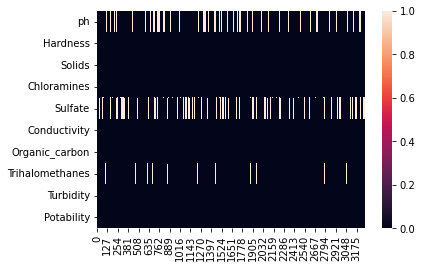

In [ ]:
sns.heatmap(df.isna().transpose())

In [ ]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

The dataframe contains 1998 data which potability is 0 and 1278 data which potability is 1 which can aslo be seen in figure below

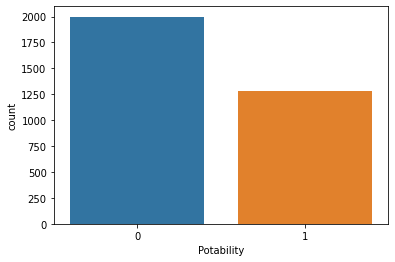

In [ ]:
sns.countplot(x='Potability',data=df)

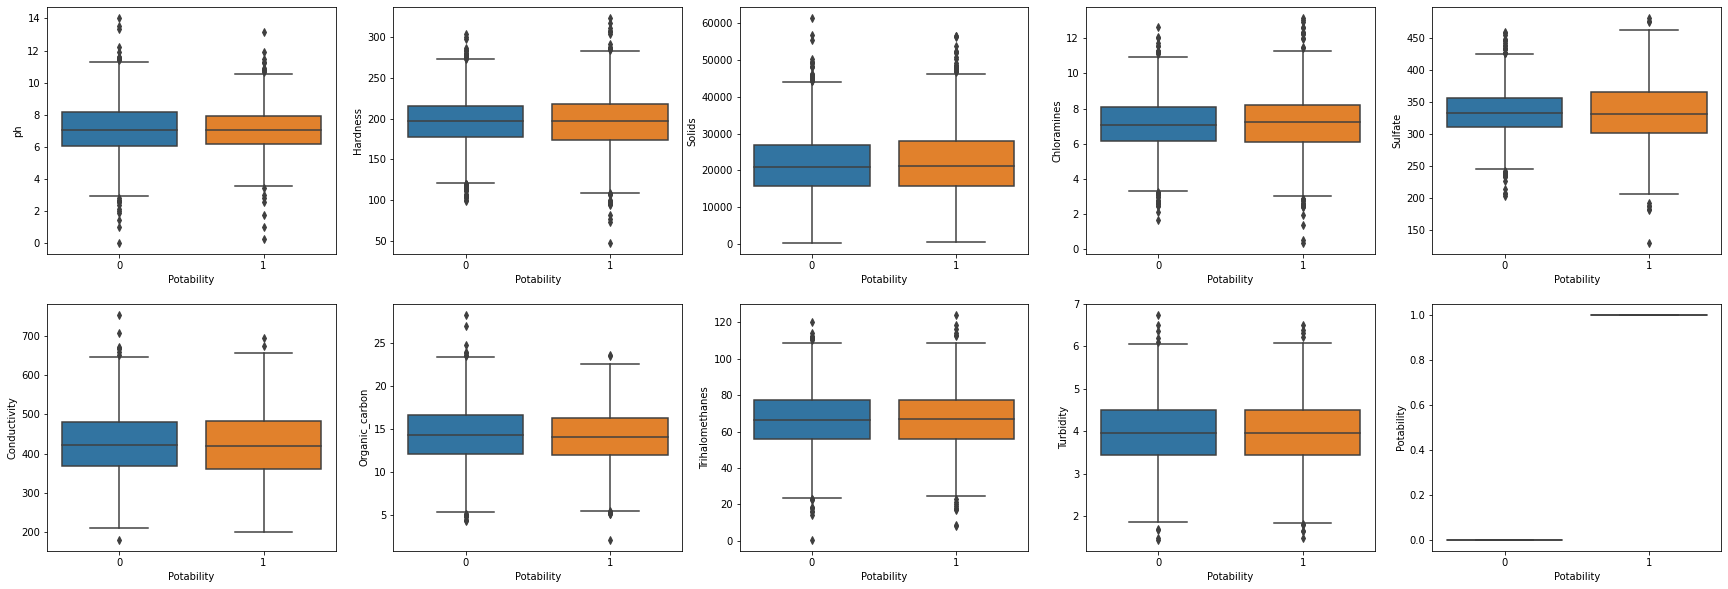

In [ ]:
fig, axes = plt.subplots(ncols = 5, nrows = 2, figsize = (30, 10))
index = 0
ax = axes.flatten()

for col, value in df.items():
    sns.boxplot(x='Potability',y=col, data=df, ax=ax[index])
    index += 1

The presence of outliers can be seen in above figures for each columns with respect to potability

##Handling Missing data first for Trihalomethanes which contains 162(4.95%) missing data

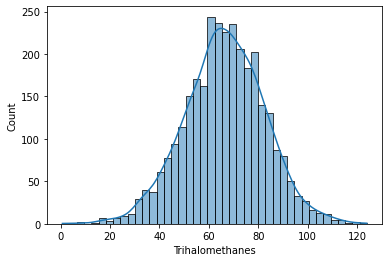

In [ ]:
sns.histplot(df.Trihalomethanes,kde=True)

The histogram above shows that the data are normally disrtibuted

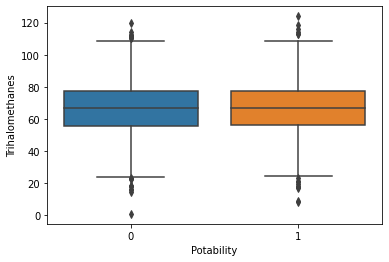

In [ ]:
sns.boxplot(x='Potability',y='Trihalomethanes',data=df)

In [ ]:
df.groupby('Potability').Trihalomethanes.median()

Potability
0    66.542198
1    66.678214
Name: Trihalomethanes, dtype: float64

In [ ]:
def fill_missing(data):

  trih=data[0]
  pota=data[1]

  if pd.isnull(trih):
    if pota==0:
      return 66.542198
    else:
      return 66.678214    
  return trih

In [ ]:
trih_imputed=df[['Trihalomethanes','Potability']].apply(fill_missing, axis='columns')

In [ ]:
df.Trihalomethanes=trih_imputed

In [ ]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes      0
Turbidity            0
Potability           0
dtype: int64

Here, we can see the number of missing values for Trihalomethanes is 0 suggesting that the missing values are filled.

##Sulfate contains 781(23.84%) missing values which is more than 15%, so we drop the column

In [ ]:
df.drop(columns=['Sulfate'],inplace=True)

In [ ]:
df.columns


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

Sulfate columns no longer existed.

##Handling Missing data for ph

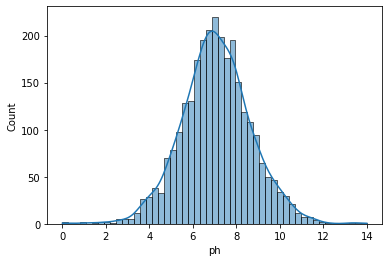

In [ ]:
sns.histplot(df.ph,kde=True)

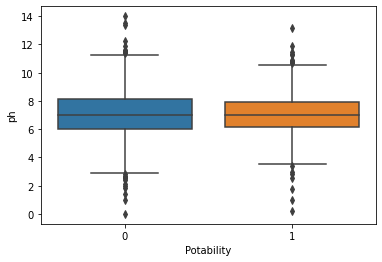

In [ ]:
sns.boxplot(x='Potability',y='ph',data=df)

In [ ]:
df.groupby('Potability').ph.mean()

Potability
0    7.085378
1    7.073783
Name: ph, dtype: float64

In [ ]:
def fill_missing_ph(data):
  phh=data[0]
  pota=data[1]

  if pd.isnull(phh):
    if pota==0:
      return 7.085378
    else:
      return 7.073783    
  return phh

In [ ]:
phh_imputed=df[['ph','Potability']].apply(fill_missing_ph, axis='columns')

In [ ]:
df.ph=phh_imputed

In [ ]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Now we can see none of the columns contains missing values

#Corelation between features



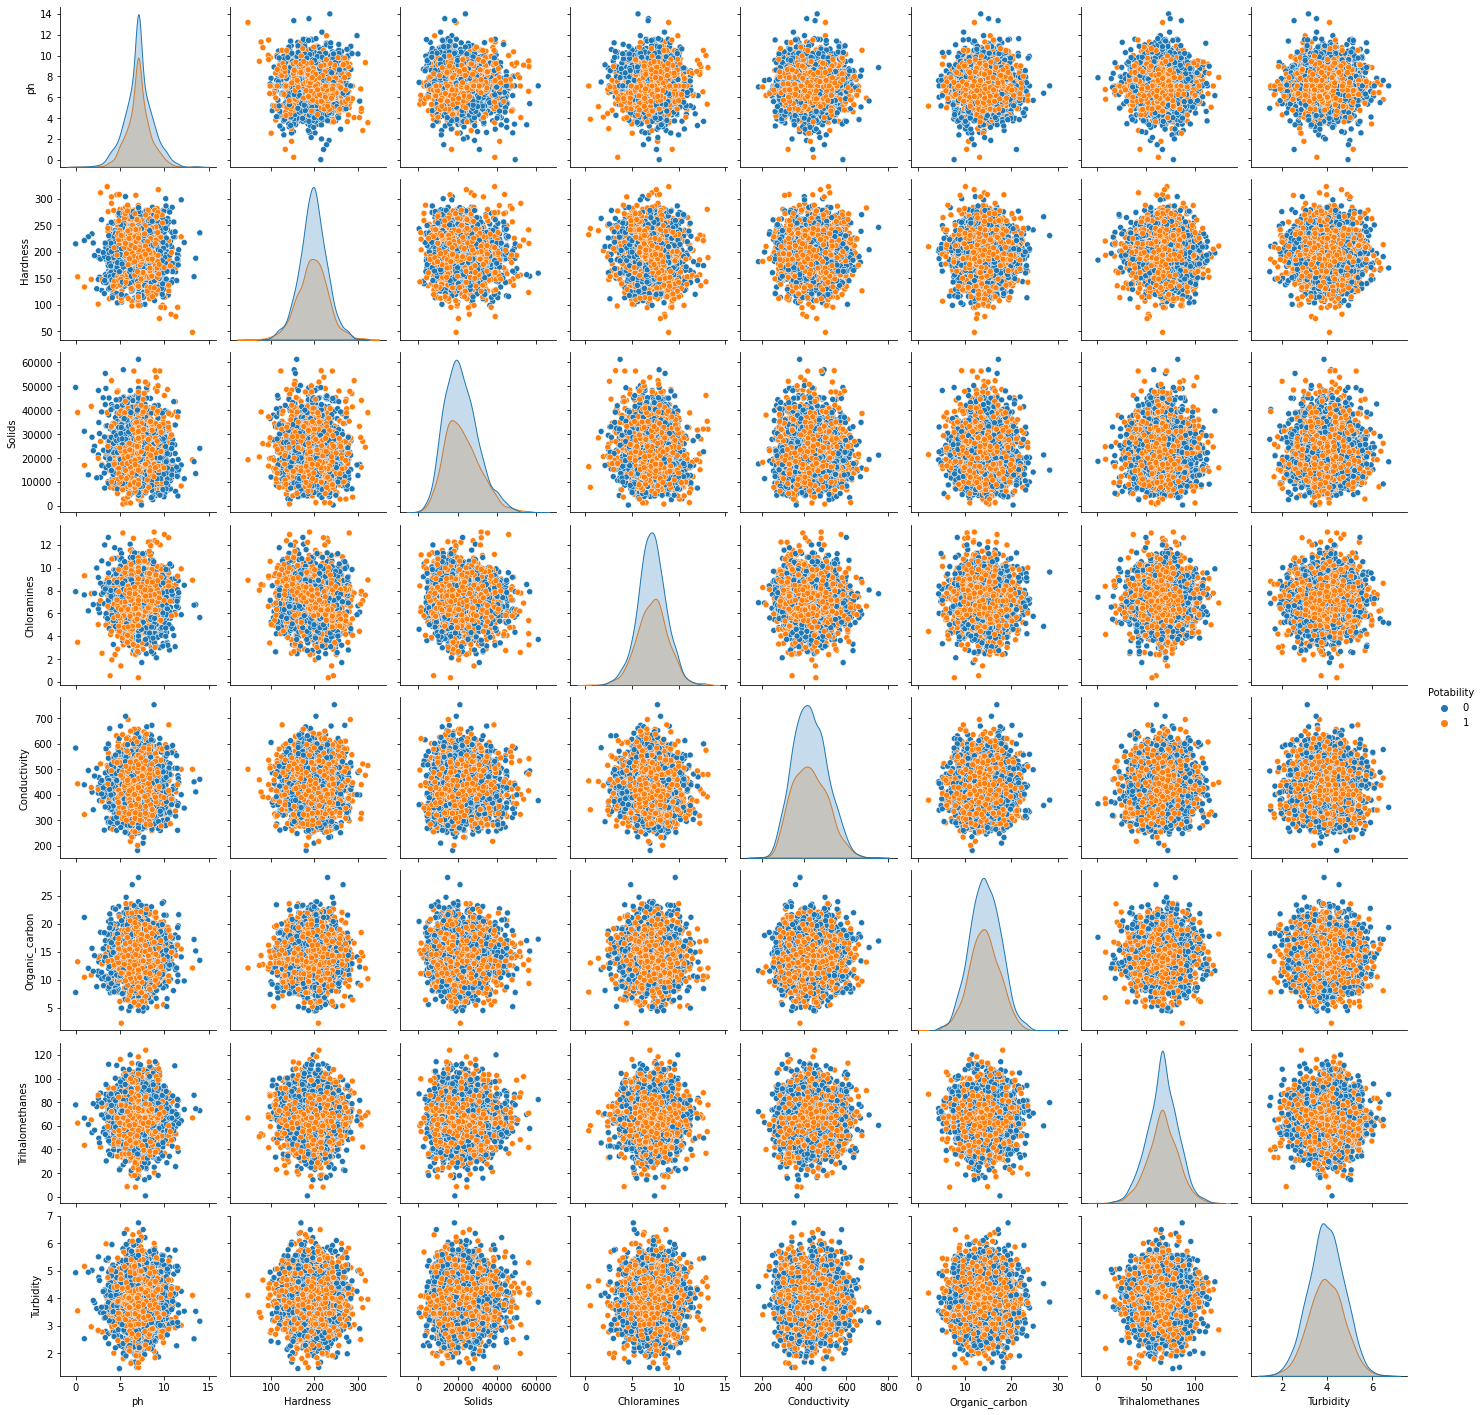

In [ ]:
sns.pairplot(df,hue='Potability')

In [ ]:
df.corr()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075878,-0.081887,-0.031827,0.017205,0.040092,0.003013,-0.036211,-0.003848
Hardness,0.075878,1.000000,-0.046899,-0.030054,-0.023915,0.003610,-0.012721,-0.014449,-0.013837
Solids,-0.081887,-0.046899,1.000000,-0.070148,0.013831,0.010242,-0.008793,0.019546,0.033743
Chloramines,-0.031827,-0.030054,-0.070148,1.000000,-0.020486,-0.012653,0.016609,0.002363,0.023779
Conductivity,0.017205,-0.023915,0.013831,-0.020486,1.000000,0.020966,0.001183,0.005798,-0.008128
Organic_carbon,0.040092,0.003610,0.010242,-0.012653,0.020966,1.000000,-0.012942,-0.027308,-0.030001
Trihalomethanes,0.003013,-0.012721,-0.008793,0.016609,0.001183,-0.012942,1.000000,-0.021511,0.007094
Turbidity,-0.036211,-0.014449,0.019546,0.002363,0.005798,-0.027308,-0.021511,1.000000,0.001581
Potability,-0.003848,-0.013837,0.033743,0.023779,-0.008128,-0.030001,0.007094,0.001581,1.000000


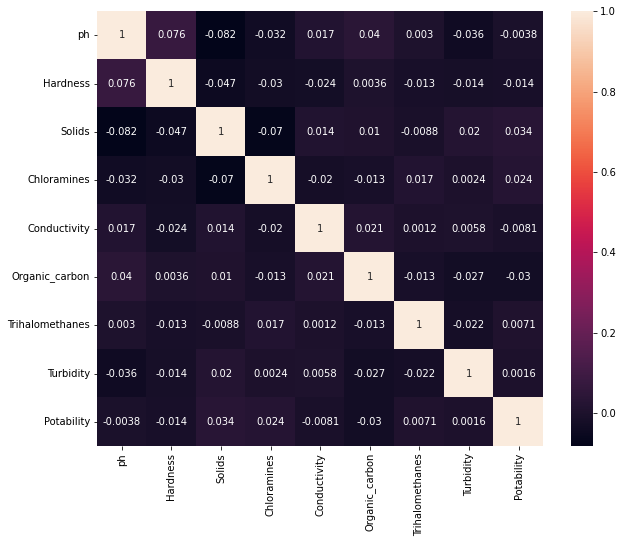

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True)

The correlation between the features are very poor as shown in figure above hence the classification should be usedfor analysis

#Train test Split

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
x = df.drop('Potability', axis=1)
y = df['Potability']

In [ ]:
x.shape, y.shape

((3276, 8), (3276,))

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x=scaler.fit_transform(x)


In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=40)

In [ ]:
x_train.shape,y_train.shape

((2194, 8), (2194,))

In [ ]:
x_train

array([[ 0.67795018, -2.16174396,  0.2186768 , ...,  0.30069999,
        -0.23703358,  0.40125575],
       [-0.35464064, -1.34614843,  0.0695706 , ..., -1.26298093,
        -0.70519079, -0.38746298],
       [-0.95873263,  0.59843252, -0.69177353, ...,  1.09163478,
         0.7009398 , -0.17125812],
       ...,
       [-0.52790761,  1.60345299, -0.11037052, ...,  0.24310631,
        -0.86342616,  0.32619702],
       [ 1.56433298, -0.91558859,  1.19277821, ..., -0.45503052,
        -0.60963707,  0.76828877],
       [-0.38688339,  0.0667741 , -0.04420202, ..., -1.54403208,
         0.00865109,  1.86989258]])

33% of data has been used to train data

#Modeling logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,classification_report

In [ ]:
lg=accuracy_score(y_test,y_pred)

In [ ]:
precision_score(y_test,y_pred)

1.0

In [ ]:
recall_score(y_test,y_pred)

0.0023094688221709007

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       649
           1       1.00      0.00      0.00       433

    accuracy                           0.60      1082
   macro avg       0.80      0.50      0.38      1082
weighted avg       0.76      0.60      0.45      1082



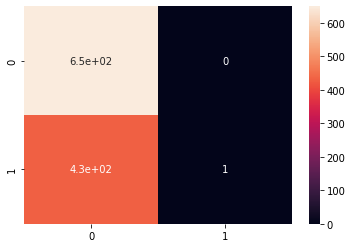

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

# Decision Tree Classifier

##Selection of features




### chi square test to select best feature for classification

In [ ]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [ ]:
from sklearn.feature_selection import chi2,SelectKBest


In [ ]:
best=SelectKBest(chi2,k=2)

In [ ]:
best.fit(X,y)

SelectKBest(k=2, score_func=<function chi2 at 0x7f8d6b8174c0>)

In [ ]:
new_x=best.transform(X)

In [ ]:
new_x[0]

array([  204.89045547, 20791.31898075])

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0


Chisquare and K best chosse Hardness and Solids as best feature

In [ ]:
X=df[['Hardness','Solids']]


In [ ]:
X.head()

,Hardness,Solids
0,204.890455,20791.318981
1,129.422921,18630.057858
2,224.236259,19909.541732
3,214.373394,22018.417441
4,181.101509,17978.986339


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=40)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       649
           1       0.47      0.45      0.46       433

    accuracy                           0.57      1082
   macro avg       0.55      0.55      0.55      1082
weighted avg       0.57      0.57      0.57      1082



###Hyper parameter tuning

In [ ]:
param_grid={
    'criterion': ['gini', 'entropy'],
    'max_depth':[2,6,9],
    'max_features':['sqrt','log2'],
    'random_state':[10,20,30,40]

}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=40)

In [ ]:
model=DecisionTreeClassifier()

In [ ]:
cv=GridSearchCV(model,param_grid=param_grid,cv=5)

In [ ]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 6, 9],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [10, 20, 30, 40]})

In [ ]:
best_model=cv.best_estimator_

In [ ]:
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='sqrt',
                       random_state=30)

The best model is entropy with maximum depth of 2 and maximum features as square root and random state value 30

In [ ]:
best_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='sqrt',
                       random_state=30)

In [ ]:
y_pred=best_model.predict(x_test)

In [ ]:
dt=accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       649
           1       1.00      0.00      0.00       433

    accuracy                           0.60      1082
   macro avg       0.80      0.50      0.38      1082
weighted avg       0.76      0.60      0.45      1082



As we can see after hyper parameter tuning the values of prescion value, recall, f1-score, accuracy have been increased

#Random Forest

##selection of features

In [ ]:
df.groupby('Potability').mean()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,
0,7.085378,196.733292,21777.490788,7.092175,426.730454,14.364335,66.316335,3.965800
1,7.073783,195.800744,22383.991018,7.169338,425.383800,14.160893,66.545646,3.968328


From above table we can draw following conclusions,

There is not such notable variation in mean values. However for following features the mean are some how vary by value more than 1 hence are choosen as fetures for bulding model:
1.   Hardness (196.7 vs 195.8)
2.   Solids (21777.49 vs 22383)
3.   Conductivity	(426 vs 425)











In [ ]:
X = df[['Hardness','Solids','Conductivity']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=40)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.79      0.70       649
           1       0.48      0.29      0.36       433

    accuracy                           0.59      1082
   macro avg       0.55      0.54      0.53      1082
weighted avg       0.56      0.59      0.56      1082



In [ ]:
rf=accuracy_score(y_test,y_pred)

,Model,Accuracy_score
0,Logistic Regression,0.600739
1,Decision Tree,0.600739
2,Random Forest,0.587800


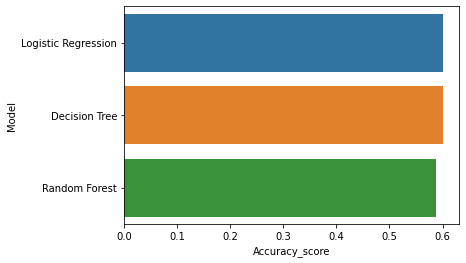

In [ ]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy_score' :[lg, dt, rf]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

The logistic regression and Descion tree acheived better accuracy